In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
ocd_df = pd.read_csv('ocd_patient_dataset.csv')

In [8]:
ocd_df

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


In [9]:
summary_stats = ocd_df.describe()
summary_stats

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


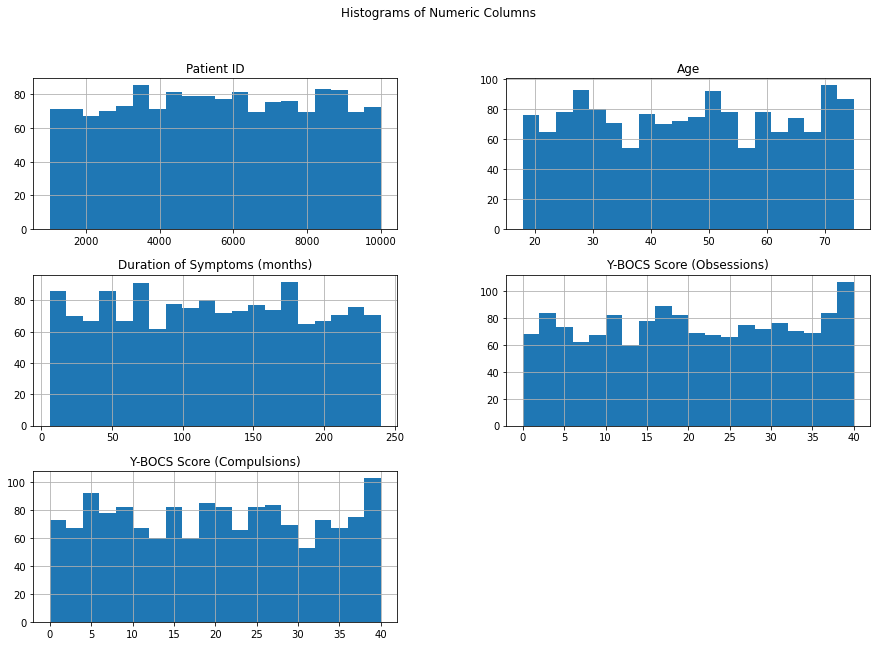

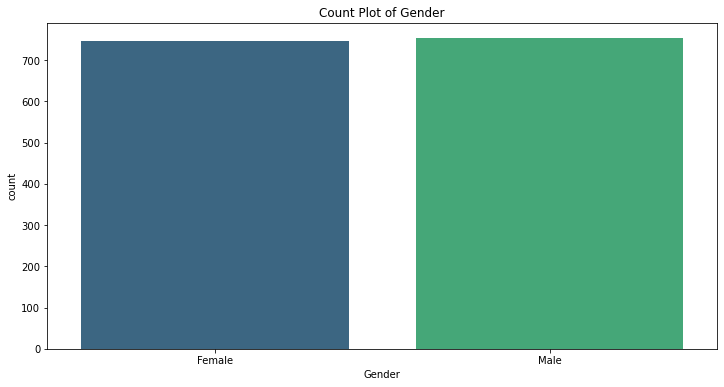

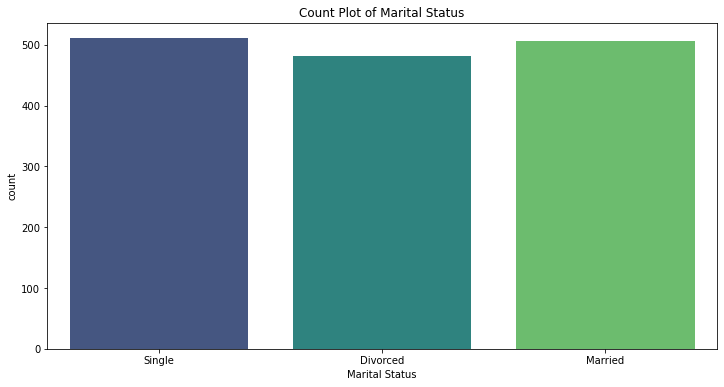

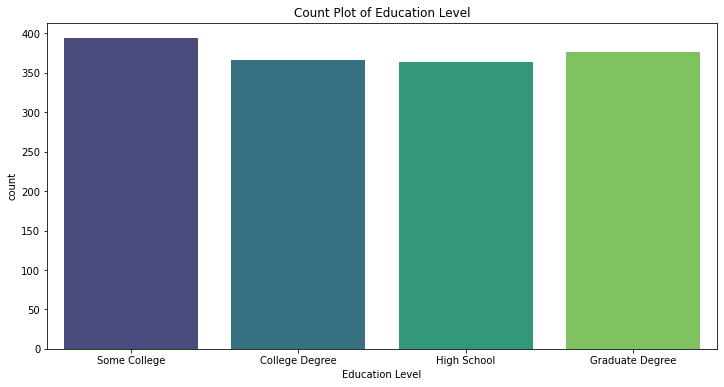

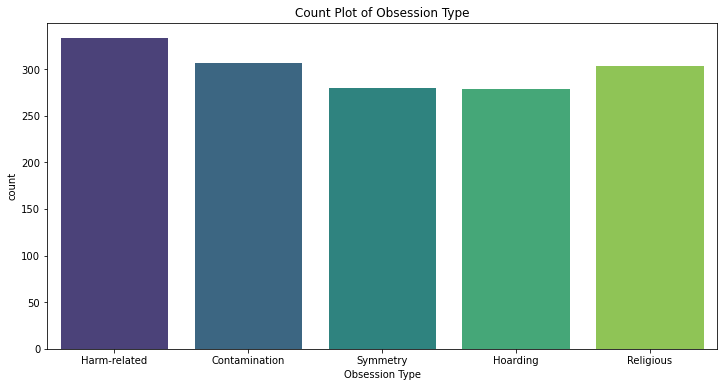

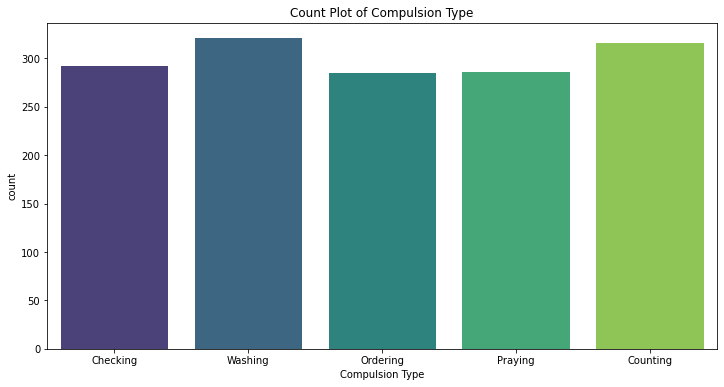

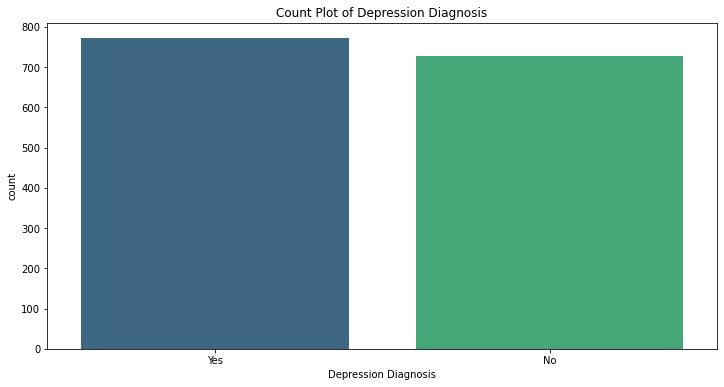

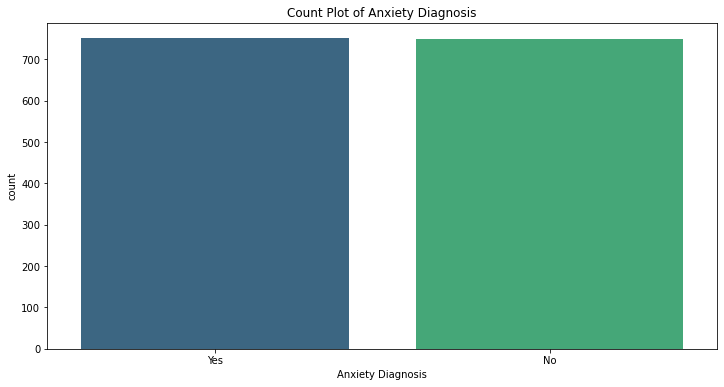

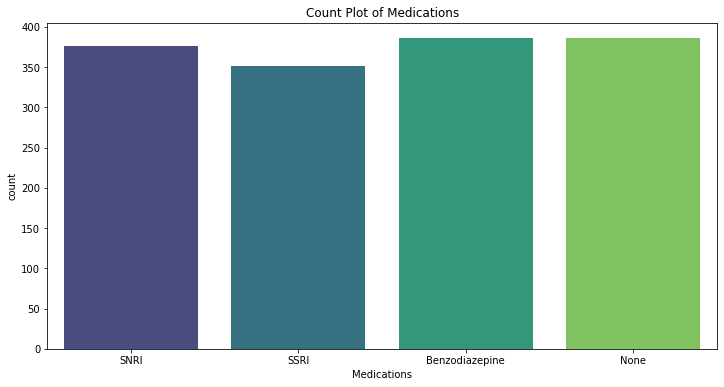

C:\Users\alecb\AppData\Local\Temp\ipykernel_18660\1655696794.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ocd_df.corr()


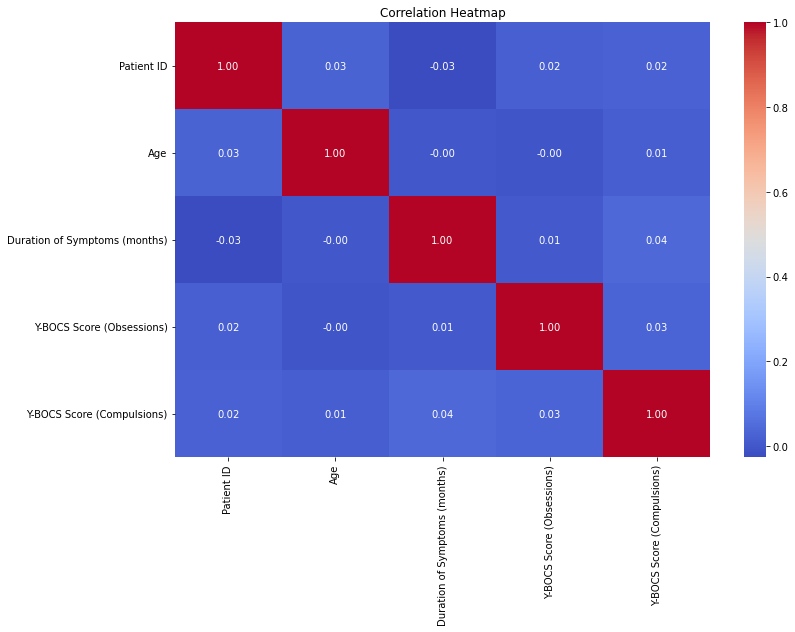

In [16]:
ocd_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

# Plot a count plot for categorical columns
categorical_columns = ['Gender', 'Marital Status', 'Education Level', 'Obsession Type', 'Compulsion Type', 'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications']
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=ocd_df, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.show()


# Calculate correlation matrix
correlation_matrix = ocd_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()